In [1]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
# DEVICE = "cpu"  # Forcing CPU usage
print(f"Using device: {DEVICE}")




/home/groups/ai/gupta/anaconda/anaconda3/envs/diff/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


In [2]:
tokenizer = CLIPTokenizer("../dataa/vocab.json", merges_file="../dataa/merges.txt")
model_file = "../dataa/v1-5-pruned-emaonly.ckpt"

models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)


In [66]:

# text to image
prompt = "make cat into a dog"
# uncond_prompt = "don't change the dog"
do_cfg = True
cfg_scale=20

#image to image

image_path = "../image/A-Cat.jpg"
input_image = Image.open(image_path)

strength = 0.9  # between 0 and 1

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt = prompt,
    uncon_prompt = "",
    input_image = input_image,
    strength = strength,
    do_cfg = do_cfg,
    cfg_scale = cfg_scale,
    sampler_name= sampler,
    n_inference_steps = num_inference_steps,
    seed = seed,
    device = DEVICE,
    idle_device="cpu",
    model = models,
    tokenizer = tokenizer,

)


100%|██████████| 45/45 [00:03<00:00, 12.59it/s]


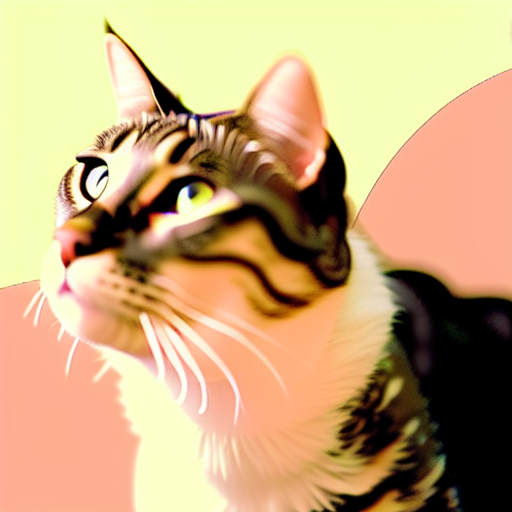

In [67]:
Image.fromarray(output_image)
# a = Image.fromarray(output_image)

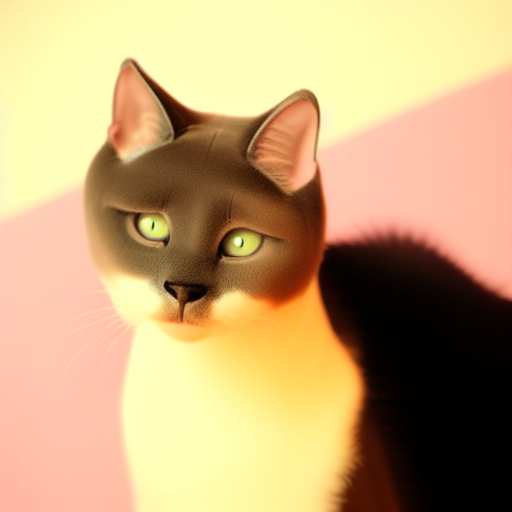

In [50]:
Image.fromarray(output_image)
# b = Image.fromarray(output_image)